**Name: Christ-Brian Amedjonekou**  
**Date: 1/30/2019**  
**MAT 4880-D692 (Math Modeling II) Whale Problem**  
**Spring 2019, Section: D692, Code: 36561**  
**Instructor: Johann Thiel**

# Section 4.2 - Dynamical Systems

## Whale Problem

**Variables**

$B = \text{number of blue whales}$  
$F = \text{number of finn whales}$  
$g_B = \text{growth rate for blue whales}$  
$g_F = \text{growth rate for finn whales}$  
$c_B = \text{competition term for blue whales}$  
$c_F = \text{competition term for finn whales}$  

**Assumptions**

$g_B = 0.05B\Big(1 - \dfrac{B}{150000}\Big)$  

$g_F = 0.08F\Big(1 - \dfrac{F}{400000}\Big)$  

$c_B = c_F = \alpha BF; \text{ where } \alpha = 10^{-8}$

$\frac{dB}{dt} = g_B - c_B$

$\frac{dF}{dt} = g_F - c_F$

$B, F \geq 0$

**Objective**

$\text{Determine if } B\rightarrow 0 \text{ over time}$

### Modules

In [20]:
# Modules being called
import math as m
import numpy as np
from sympy.solvers import solve
from sympy import plot_implicit, Eq
import sympy as sp
from matplotlib import pyplot as plt
import pandas as pd

### Variables

In [3]:
B,F = sp.symbols('B F')
g_B, g_F = 0.05*B*(1-B/150000), 0.08*F*(1-F/400000)
c_B, c_F = m.pow(10,-8)*B*F, m.pow(10,-8)*B*F
dBdt, dFdt = g_B - c_B, g_F - c_F

### Equillibrium Points

In [4]:
# init_printing() displays LaTeX version of outputs; 'quiet= True' stops 
# init_printing from printing messages regarding its status

sp.init_printing()

# Solution to the system (Equillibrium Points)

solve([dBdt, dFdt], B, F)

### Nullclines Solutions

In [5]:
solve(dBdt, B)[0]

In [6]:
solve(dBdt, B)[1]

In [7]:
solve(dFdt, F)[0]

In [8]:
solve(dFdt, F)[1]

### Functions

In [9]:
def dB_dt(blue, fin):
    """Function that calculates the rate of change for blue whales in the system.
    A differential equation. It takes two inputs."""
    growth_Blue = 0.05*blue*(1-blue/150000)
    competition_Blue = m.pow(10,-8)*blue*fin
    dBxdt = growth_Blue - competition_Blue
    return dBxdt
    
    
def dF_dt(blue, fin):
    growth_Fin = 0.08*fin*(1-fin/400000)
    competition_Fin = m.pow(10,-8)*blue*fin
    dFxdt = growth_Fin - competition_Fin
    return dFxdt

### Plotting Vector Field

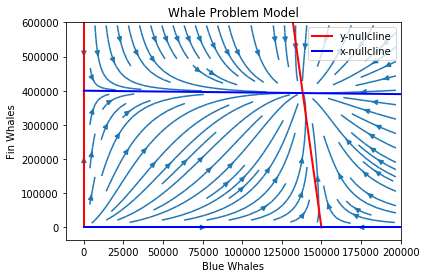

In [19]:
%matplotlib inline
#----------------------------------------------------------------------------------------
# Creates the superimposed plot for stream plot of the model, as well as dBdt = dFdt = 0.
#----------------------------------------------------------------------------------------

# Part 1: Creates the length of the 'X' and 'Y' Axis 
x, y = np.linspace(0, 200000), np.linspace(0, 600000)
X, Y = np.meshgrid(x, y)

# Part 2: Equations of the nullclines
b, f = x, y
B1, F1, B2, F2 = -0.03*f+150000.0, -0.05*b+400000.0, 0*f, 0*b

# Part 3: The approximated points of the functions dB/dt and dF/dt which we'll use for the plot.
U, V = dB_dt(X, Y), dF_dt(X, Y)

# Part 4: Creating the figure for the plot
fig, ax1 = plt.subplots()

# Part 5: Creating the plots for dB/dt = 0 and dF/dt = 0, the Nullclines
ax1.plot(B1, f, 'r-', lw=2, label='y-nullcline')
ax1.plot(B2, f, 'r-', lw=2)
ax1.plot(b, F1, 'b-', lw=2, label='x-nullcline')
ax1.plot(b, F2, 'b-', lw=2)

# Part 6: Sets the axis, and equillibrium information for the plot
ax1.set(title= 'Whale Problem Model', xlabel= 'Blue Whales', ylabel= 'Fin Whales')
ax1.tick_params(axis='Fin Whales', labelcolor='k')
ax1.legend(loc= 'upper right')

# Part 7: Plots the streamplot which represents the vector plot.
ax1.streamplot(X, Y, U, V)